# INSTALLING DEPENDECY


In [ ]:
# INSTALLING DEPENDECY
!pip install rdkit
!pip install deepchem
! pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit 
from rdkit import Chem
from rdkit.Chem import AllChem , rdmolops , AddHs, Draw
import torch
import deepchem as dc
import xgboost as xgb


# Defining variables


## paths

In [2]:
dx_train = pd.read_csv('X_train.csv')
dy_train =pd.read_csv('y_train.csv')['y']

dx_validation = pd.read_csv('X_test.csv')

## convert Smiles to molecules object

In [3]:
dx_train['mol'] = dx_train['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 
dx_train['y'] = dy_train

In [4]:
molecules_train = [Chem.MolFromSmiles(smile) for smile in dx_train['smiles']]
molecules_validation = [Chem.MolFromSmiles(smile) for smile in dx_validation['smiles']]
print(f'the drugs molecules are stored as {type(molecules_train)}')

the drugs molecules are stored as <class 'list'>


## Convert Mol to fingerprints

In [7]:
fp_train = np.array([AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in molecules_train])
fp_validation = np.array([AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in molecules_validation])


#train=dx_train.merge(dy_train , left_index=True, right_index=True)
#train.head()

In [8]:
print(f'the shape of the fingerprint for training data: {fp_train.shape}')
print(f'the shape of the fingerprint for validation data: {fp_validation.shape}')


the shape of the fingerprint for training data: (4400, 2048)
the shape of the fingerprint for validation data: (2934, 2048)


# visualisation data

### molecules_train data visualisation

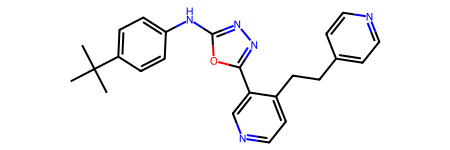

In [9]:
#MolFromSmiles data
molecules_train[1]


In [10]:
#Molecular fingerprint data
fp_train[1]

array([0, 0, 0, ..., 0, 0, 0])

### AddHs function

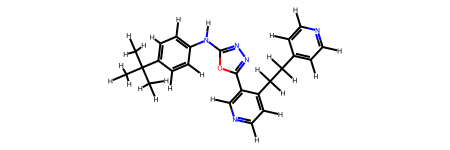

In [11]:
#Ad. H atomes
molecule_1=AddHs(molecules_train[1])
molecule_1


### enumerate atoms Visually 

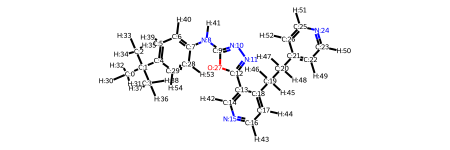

In [12]:
for i, atom in enumerate(molecule_1.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
molecule_1

## Manipulate atoms and bonds

In [13]:
# print the atoms of the molecule ---------------------------------------------
for atom in molecule_1.GetAtoms():
    print(atom.GetIdx(),',',
          atom.GetIsAromatic(),',',
          #atom.GetAtomicNum(),',',
          atom.GetSymbol())

0 , False , C
1 , False , C
2 , False , C
3 , False , C
4 , True , C
5 , True , C
6 , True , C
7 , True , C
8 , False , N
9 , True , C
10 , True , N
11 , True , N
12 , True , C
13 , True , C
14 , True , C
15 , True , N
16 , True , C
17 , True , C
18 , True , C
19 , False , C
20 , False , C
21 , True , C
22 , True , C
23 , True , C
24 , True , N
25 , True , C
26 , True , C
27 , True , O
28 , True , C
29 , True , C
30 , False , H
31 , False , H
32 , False , H
33 , False , H
34 , False , H
35 , False , H
36 , False , H
37 , False , H
38 , False , H
39 , False , H
40 , False , H
41 , False , H
42 , False , H
43 , False , H
44 , False , H
45 , False , H
46 , False , H
47 , False , H
48 , False , H
49 , False , H
50 , False , H
51 , False , H
52 , False , H
53 , False , H
54 , False , H


In [14]:
# print the bonds of the molecule ---------------------------------------------
for bond in molecule_1.GetBonds():
    print(bond.GetBeginAtomIdx(),',',
          bond.GetEndAtomIdx(),',',
          bond.GetBondType())

0 , 1 , SINGLE
1 , 2 , SINGLE
1 , 3 , SINGLE
1 , 4 , SINGLE
4 , 5 , AROMATIC
5 , 6 , AROMATIC
6 , 7 , AROMATIC
7 , 8 , SINGLE
8 , 9 , SINGLE
9 , 10 , AROMATIC
10 , 11 , AROMATIC
11 , 12 , AROMATIC
12 , 13 , SINGLE
13 , 14 , AROMATIC
14 , 15 , AROMATIC
15 , 16 , AROMATIC
16 , 17 , AROMATIC
17 , 18 , AROMATIC
18 , 19 , SINGLE
19 , 20 , SINGLE
20 , 21 , SINGLE
21 , 22 , AROMATIC
22 , 23 , AROMATIC
23 , 24 , AROMATIC
24 , 25 , AROMATIC
25 , 26 , AROMATIC
12 , 27 , AROMATIC
7 , 28 , AROMATIC
28 , 29 , AROMATIC
29 , 4 , AROMATIC
27 , 9 , AROMATIC
18 , 13 , AROMATIC
26 , 21 , AROMATIC
0 , 30 , SINGLE
0 , 31 , SINGLE
0 , 32 , SINGLE
2 , 33 , SINGLE
2 , 34 , SINGLE
2 , 35 , SINGLE
3 , 36 , SINGLE
3 , 37 , SINGLE
3 , 38 , SINGLE
5 , 39 , SINGLE
6 , 40 , SINGLE
8 , 41 , SINGLE
14 , 42 , SINGLE
16 , 43 , SINGLE
17 , 44 , SINGLE
19 , 45 , SINGLE
19 , 46 , SINGLE
20 , 47 , SINGLE
20 , 48 , SINGLE
22 , 49 , SINGLE
23 , 50 , SINGLE
25 , 51 , SINGLE
26 , 52 , SINGLE
28 , 53 , SINGLE
29 , 54 , SINGLE


# Explore data

In [15]:
dx_train['mol'] = dx_train['mol'].apply(lambda x: Chem.AddHs(x))
dx_train['num_of_atoms'] = dx_train['mol'].apply(lambda x: x.GetNumAtoms())
dx_train['num_of_heavy_atoms'] = dx_train['mol'].apply(lambda x: x.GetNumHeavyAtoms())

## find pattern

In [16]:
c_patt = Chem.MolFromSmiles('C')
print(molecules_train[1].GetSubstructMatches(c_patt))

((0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (9,), (12,), (13,), (14,), (16,), (17,), (18,), (19,), (20,), (21,), (22,), (23,), (25,), (26,), (28,), (29,))


## function to find patterns

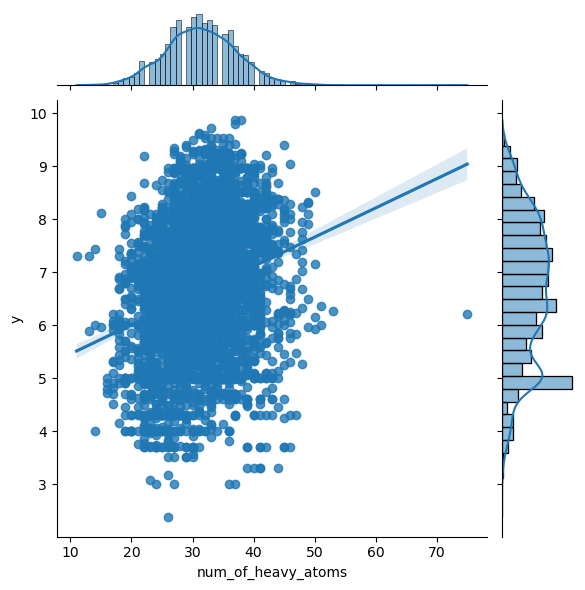

In [17]:

sns.jointplot(data=dx_train, x='num_of_heavy_atoms', y='y', kind="reg")
plt.show()

In [18]:
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl'], dx_train)

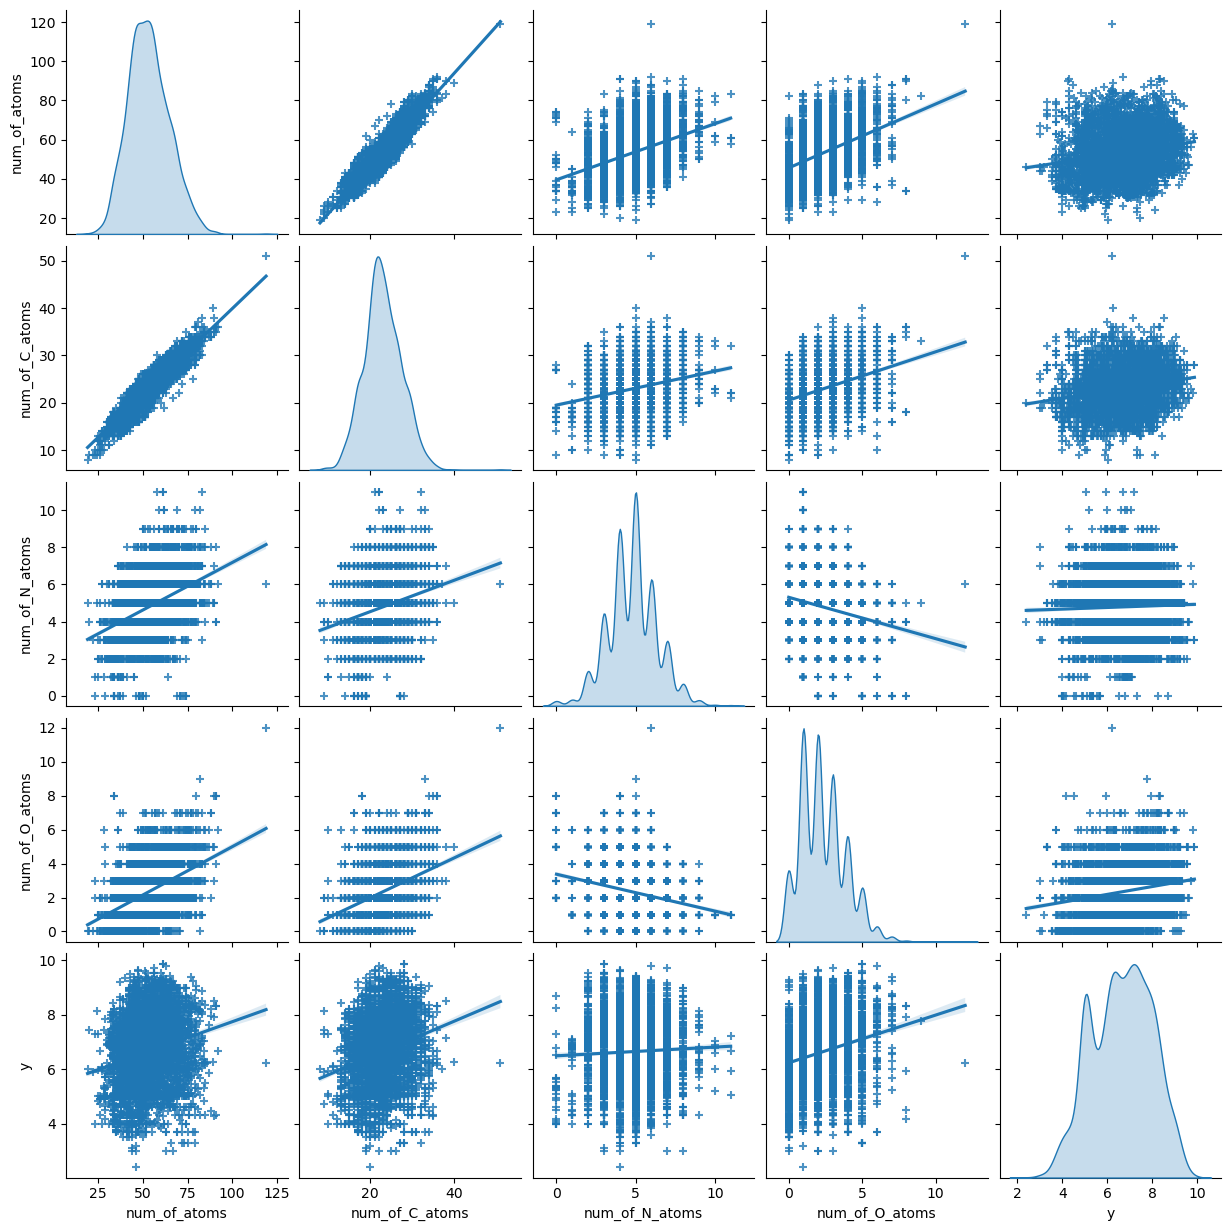

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(dx_train[['num_of_atoms','num_of_C_atoms','num_of_N_atoms', 'num_of_O_atoms', 'y']], diag_kind='kde', kind='reg', markers='+')
plt.show()

# Ensemble learning

In [21]:
from sklearn.model_selection import train_test_split
# Extract feature and target arrays
X, y = fp_train, dy_train
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
fp_validation

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

In [29]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [30]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, preds, squared=False)



In [37]:
n = 500


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50,
   # Activate early stopping
   early_stopping_rounds=50
)

[0]	validation-rmse:1.23479	train-rmse:1.20857
[50]	validation-rmse:0.85660	train-rmse:0.58545
[100]	validation-rmse:0.84056	train-rmse:0.44862
[150]	validation-rmse:0.83244	train-rmse:0.36155
[200]	validation-rmse:0.83374	train-rmse:0.30277
[250]	validation-rmse:0.82922	train-rmse:0.25277
[300]	validation-rmse:0.82911	train-rmse:0.21600
[350]	validation-rmse:0.82618	train-rmse:0.18348
[400]	validation-rmse:0.82721	train-rmse:0.15486
[450]	validation-rmse:0.82879	train-rmse:0.13639
[499]	validation-rmse:0.83112	train-rmse:0.12027


In [38]:
dtest_new = xgb.DMatrix(fp_validation)
predictions = model.predict(dtest_new)


In [39]:
predictions

array([7.2620893, 5.73406  , 7.2779827, ..., 8.5477495, 7.8424344,
       7.0440216], dtype=float32)

In [40]:
submission_df = pd.DataFrame()
submission_df['id'] = dx_validation['id']
submission_df['y'] = predictions

submission_df.to_csv('y_benchmark.csv', index=False)

### import dependency

In [41]:
from m2vec import features


In [42]:
from m2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

### Load pre-trained-model

In [43]:
model = word2vec.Word2Vec.load('model_300dim.pkl')


In [44]:
#print('Molecular sentence:', mol2alt_sentence(dx_train['mol'][2], radius=1))

#print('\nMolSentence object:', MolSentence(mol2alt_sentence(dx_train['mol'][2], radius=1)))

print('\nDfVec object:',DfVec(sentences2vec(MolSentence(mol2alt_sentence(dx_train['mol'][2], radius=1)), model, unseen='UNK')))


DfVec object: (114, 100) dimensional vector


In [45]:
#print('Molecular sentence:', mol2alt_sentence(dx_train['mol'][1], radius=1))

#print('\nMolSentence object:', MolSentence(mol2alt_sentence(dx_train['mol'][1], radius=1)))

print('\nDfVec object:',DfVec(sentences2vec(MolSentence(mol2alt_sentence(dx_train['mol'][1], radius=1)), model, unseen='UNK')))


DfVec object: (110, 100) dimensional vector


In [46]:
dx_train['sentence'] = dx_train.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)

In [47]:
dx_train[:5]

,id,smiles,mol,y,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,sentence,networkx
0,0,CNC(=O)c1ccccc1Sc1ccc2c(C#Cc3cccc(NCCOC)c3)n[n...,<rdkit.Chem.rdchem.Mol object at 0x29a202b20>,7.882729,57,33,26,2,4,0,"(2246728737, 1875878936, 847961216, 3786497449...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,1,CC(C)(C)c1ccc(Nc2nnc(-c3cnccc3CCc3ccncc3)o2)cc1,<rdkit.Chem.rdchem.Mol object at 0x29a202c70>,6.508498,55,30,24,1,5,0,"(2246728737, 2698001293, 2245277810, 994237755...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,2,CN1CCN(CCCn2ccc(-c3cnc4c(-c5ccsc5)cnn4c3)cc2=O...,<rdkit.Chem.rdchem.Mol object at 0x29a202ce0>,8.148742,57,31,23,1,6,0,"(2246728737, 241489735, 2092489639, 2021812431...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,3,CCn1c2ccc(NC(=O)Nc3ccc(OC)cc3)cc2c2c3c(c4c(c21...,<rdkit.Chem.rdchem.Mol object at 0x29a202d50>,7.954677,67,39,30,3,6,0,"(2246728737, 245196591, 2245384272, 593804746,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,4,Cc1ccc(C(=O)Nc2cccc(C(C)C)c2)cc1N1CCc2ncncc2C1,<rdkit.Chem.rdchem.Mol object at 0x29a202dc0>,7.954677,55,29,24,1,4,0,"(2246728737, 447750523, 3217380708, 3124581743...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [ ]:
X, y = dx_train, dy_train
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## archives

In [26]:
# define the function for coverting rdkit object to networkx object -----------     
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

### convert rdkit object to networkx object

In [27]:
dx_train['networkx'] = dx_train['mol'].apply(lambda x: mol_to_nx(x)) 


In [28]:
dx_train['networkx'][5]

In [29]:
first_molecule = nx.get_node_attributes(dx_train['networkx'][5], 'atom_symbol')
first_molecule


{0: 'C',
 1: 'C',
 2: 'O',
 3: 'C',
 4: 'C',
 5: 'C',
 6: 'C',
 7: 'C',
 8: 'C',
 9: 'C',
 10: 'C',
 11: 'C',
 12: 'C',
 13: 'C',
 14: 'C',
 15: 'N',
 16: 'C',
 17: 'C',
 18: 'C',
 19: 'C',
 20: 'C',
 21: 'C',
 22: 'C',
 23: 'N',
 24: 'N',
 25: 'C',
 26: 'C',
 27: 'C',
 28: 'C',
 29: 'O',
 30: 'N',
 31: 'C',
 32: 'H',
 33: 'H',
 34: 'H',
 35: 'H',
 36: 'H',
 37: 'H',
 38: 'H',
 39: 'H',
 40: 'H',
 41: 'H',
 42: 'H',
 43: 'H',
 44: 'H',
 45: 'H',
 46: 'H',
 47: 'H',
 48: 'H',
 49: 'H',
 50: 'H',
 51: 'H',
 52: 'H',
 53: 'H',
 54: 'H',
 55: 'H',
 56: 'H',
 57: 'H'}